In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
import pandas as pd
url='https://dl.dropboxusercontent.com/s/gyjmd8se7669h15/complete_category_data.csv'

df = pd.read_csv(url)
df.head(5)

,title_desc,class
0,How To Get Your Kids To Bed In A Few Dozen Eas...,Family & Parenting
1,Plus Size Models Are More Popular Than Ever B...,Home and Living lifestyle and beauty
2,HuffPost Workouts Songs to Help You Sleep Thes...,Health and Filtness
3,As Trump s Panel Seeks Personal Data These Lon...,Politics
4,Todd Akin Is Clapping For Donald Trump So That...,Politics


In [3]:
# Data analysis and preparation
# K Nearest Neighbors
# Naive Bayes - MultinomialNB
# AdaBoostClassifier
# ExtraTreesClassifier

In [4]:
list(set(df['class']))

['Media',
 'Politics',
 'Religion',
 'Health and Filtness',
 'Education',
 'Business_FINANCE',
 'Sports',
 'Crime',
 'SOCIETY',
 'Home and Living lifestyle and beauty',
 'Food & drink',
 'Travel and Leisure',
 'Environment',
 'science and technology',
 'automotive',
 'Arts, Culture & Entertainment',
 'Family & Parenting']

In [5]:
df['class'].value_counts() # count vlaue

Politics                                29246
Arts, Culture & Entertainment           22370
Health and Filtness                     21834
Home and Living lifestyle and beauty    14297
Family & Parenting                      11240
Travel and Leisure                       8795
Food & drink                             7412
Business_FINANCE                         6799
SOCIETY                                  6353
Sports                                   4338
science and technology                   3777
Crime                                    3047
Media                                    2503
Religion                                 2296
automotive                               2163
Education                                1914
Environment                              1169
Name: class, dtype: int64

In [6]:
n=int(df.shape[0] *0.25+0.75)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

data_YouTube = df.loc[:,['title_desc'  , 'class']]


# Splitting the data into 0.25 training instances and 104 test instances
all_Ids = np.arange(len(data_YouTube)) 
# random.shuffle(all_Ids)
test_Ids = all_Ids[0:n]
train_Ids = all_Ids[n:]
data_test = data_YouTube.loc[test_Ids, :]
data_train = data_YouTube.loc[train_Ids, :]

count_vect = CountVectorizer()
X_train = count_vect.fit_transform(data_train['title_desc'])
Y_train = data_train['class']

X_test = count_vect.transform(data_test['title_desc'])
Y_test = data_test['class'].astype(str)


In [8]:
print(X_train.shape)
print(Y_train.shape)


(112164, 71426)
(112164,)


In [9]:
print(X_test.shape)
print(Y_test.shape)

(37389, 71426)
(37389,)


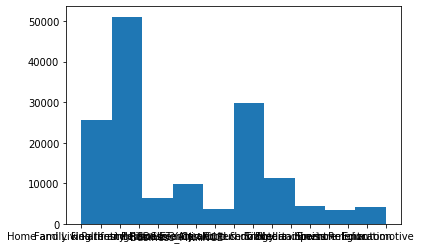

In [10]:
plt.hist(df['class'])
plt.show()

# Logistic Regression

In [11]:
# Assumptions:
# 1. there is a linear relashionship between the logit of the outcome (dependent variable) and each predictor 
# variables (independent variables)
#         logit(p) = log(p/(1-p))
# 2. there is no outliers in the predictors. seaborn boxplot
# 3. there is no co-relation between the dependent variables

In [13]:
# Training
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
# Testing
NN_pred = neigh.predict(X_test)

In [15]:
NN_pred

array(['Health and Filtness', 'Arts, Culture & Entertainment',
       'Arts, Culture & Entertainment', ..., 'Travel and Leisure',
       'Health and Filtness', 'Media'], dtype=object)

In [16]:
Y_test

0                          Family & Parenting
1        Home and Living lifestyle and beauty
2                         Health and Filtness
3                                    Politics
4                                    Politics
                         ...                 
37384                                Politics
37385                                   Crime
37386                        Business_FINANCE
37387                  science and technology
37388                                Politics
Name: class, Length: 37389, dtype: object

In [17]:
accuracy_score(Y_test,NN_pred)

0.25812404717965176

In [18]:

confusion_matrix(Y_test,NN_pred) #https://en.wikipedia.org/wiki/Confusion_matrix

array([[4151,  390,   18,   34,    2,  116,   74,  471,   62,    9,  337,
          29,    3,   12,   34,    0,    3],
       [ 896,  277,    5,   20,    3,   60,   67,  232,   17,    9,  105,
           7,    1,   12,   16,    0,    2],
       [ 529,   47,   66,    7,    0,    7,   10,   55,    5,    0,   34,
           2,    0,    1,    4,    0,    0],
       [ 226,   38,    7,   49,    1,   25,   15,   64,    3,    1,   35,
           3,    1,    1,    9,    0,    0],
       [ 181,   23,    4,    7,   14,    7,    8,   34,    4,    0,   17,
           7,    1,    0,    1,    0,    0],
       [1330,  206,   43,   54,    3,  365,  110,  433,   42,    3,  117,
          23,    4,   16,   35,    0,    6],
       [ 931,  144,    6,   20,    0,   58,  256,  262,   38,    1,   73,
          11,    0,    6,   19,    0,    1],
       [2264,  476,   33,  106,    6,  318,  255, 1666,   79,    6,  264,
          49,   17,   14,   36,    0,    4],
       [1797,  222,   18,   45,    0,   80,  102

In [19]:
print(classification_report(Y_test,NN_pred))

/home/alinemati/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                                      precision    recall  f1-score   support

       Arts, Culture & Entertainment       0.21      0.72      0.32      5745
                    Business_FINANCE       0.09      0.16      0.12      1729
                               Crime       0.23      0.09      0.13       767
                           Education       0.09      0.10      0.10       478
                         Environment       0.39      0.05      0.08       308
                  Family & Parenting       0.26      0.13      0.17      2790
                        Food & drink       0.21      0.14      0.17      1826
                 Health and Filtness       0.31      0.30      0.31      5593
Home and Living lifestyle and beauty       0.61      0.18      0.28      3538
                               Media       0.23      0.03      0.06       643
                            Politics       0.54      0.24      0.33      7404
                            Religion       0.17      0.07      

# Naive Bayes - MultinomialNB

there is no co-relation between the dependent variables

In [19]:


from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
NB_pred = clf.predict(X_test)

In [21]:
NB_pred

array(['Family & Parenting', 'Home and Living lifestyle and beauty',
       'Health and Filtness', ..., 'Travel and Leisure',
       'science and technology', 'Politics'], dtype='<U36')

In [22]:
Y_test

0                          Family & Parenting
1        Home and Living lifestyle and beauty
2                         Health and Filtness
3                                    Politics
4                                    Politics
                         ...                 
37384                                Politics
37385                                   Crime
37386                        Business_FINANCE
37387                  science and technology
37388                                Politics
Name: class, Length: 37389, dtype: object

In [23]:
accuracy_score(Y_test,NB_pred)


0.7082296932252802

In [24]:
confusion_matrix(Y_test,NB_pred)

array([[4262,   18,   13,    2,    1,  210,   28,  287,  298,    0,  445,
           1,   38,   11,  120,    1,   10],
       [  65,  747,    6,    0,    0,   56,   18,  394,   34,    0,  332,
           0,    6,    3,   45,   14,    9],
       [  74,    5,  368,    0,    0,   45,    2,   22,    4,    0,  228,
           0,    2,    2,   15,    0,    0],
       [  21,   43,    8,   28,    0,   83,    1,  118,    6,    0,  162,
           0,    0,    2,    5,    0,    1],
       [  28,   14,    2,    0,   11,   21,    6,   59,   19,    0,   82,
           0,    1,    0,   59,    1,    5],
       [ 171,    9,    5,    1,    0, 1966,   14,  492,   46,    0,   50,
           1,    6,    2,   25,    1,    1],
       [  55,    9,    0,    0,    0,   55, 1290,  238,   55,    0,   20,
           0,    4,    1,   99,    0,    0],
       [ 119,   33,    2,    0,    0,  241,   95, 4807,   48,    1,  167,
           1,   12,    6,   47,    1,   13],
       [ 220,   35,    0,    0,    0,  104,   41

In [25]:
print(classification_report(Y_test,NB_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                                      precision    recall  f1-score   support

       Arts, Culture & Entertainment       0.71      0.74      0.72      5745
                    Business_FINANCE       0.65      0.43      0.52      1729
                               Crime       0.78      0.48      0.59       767
                           Education       0.85      0.06      0.11       478
                         Environment       0.79      0.04      0.07       308
                  Family & Parenting       0.62      0.70      0.66      2790
                        Food & drink       0.82      0.71      0.76      1826
                 Health and Filtness       0.62      0.86      0.72      5593
Home and Living lifestyle and beauty       0.79      0.77      0.78      3538
                               Media       0.93      0.10      0.18       643
                            Politics       0.73      0.90      0.80      7404
                            Religion       0.94      0.13      

# AdaBoostClassifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [0]:
ada_pred = ada.predict(X_test)

In [28]:
ada_pred

array(['Family & Parenting', 'Health and Filtness', 'Health and Filtness',
       ..., 'Politics', 'Health and Filtness', 'Politics'], dtype=object)

In [29]:
Y_test

0                          Family & Parenting
1        Home and Living lifestyle and beauty
2                         Health and Filtness
3                                    Politics
4                                    Politics
                         ...                 
37384                                Politics
37385                                   Crime
37386                        Business_FINANCE
37387                  science and technology
37388                                Politics
Name: class, Length: 37389, dtype: object

In [30]:
accuracy_score(Y_test,ada_pred)

0.3163229826954452

In [31]:
confusion_matrix(Y_test,ada_pred)

array([[  70,   31,   18,   28,    1,   49,    1, 4814,  148,    1,  520,
           4,   45,    0,   15,    0,    0],
       [   8,   83,    3,   32,    1,   25,    0, 1486,   14,    0,   57,
           1,    4,    0,    6,    9,    0],
       [   3,    4,  158,   12,    0,   23,    0,  551,    3,    0,    9,
           0,    1,    0,    2,    1,    0],
       [   3,    3,    8,  188,    0,   14,    0,  246,    2,    0,   14,
           0,    0,    0,    0,    0,    0],
       [   3,    2,    3,    3,    2,    3,    1,  210,   51,    0,   28,
           0,    0,    0,    1,    1,    0],
       [   5,   12,    2,   66,    0,  532,    4, 2041,   53,    2,   40,
           2,   15,    0,   13,    3,    0],
       [   3,   12,    0,    9,    0,   16,  254, 1408,  105,    0,    8,
           0,    4,    0,    7,    0,    0],
       [  21,   27,    3,   53,    0,   96,   13, 5174,   50,    1,  110,
           0,   17,    0,   25,    3,    0],
       [   7,   14,    1,    6,    0,   25,    2

In [32]:
print(classification_report(Y_test,ada_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                                      precision    recall  f1-score   support

       Arts, Culture & Entertainment       0.38      0.01      0.02      5745
                    Business_FINANCE       0.31      0.05      0.08      1729
                               Crime       0.51      0.21      0.29       767
                           Education       0.33      0.39      0.36       478
                         Environment       0.33      0.01      0.01       308
                  Family & Parenting       0.58      0.19      0.29      2790
                        Food & drink       0.90      0.14      0.24      1826
                 Health and Filtness       0.19      0.93      0.32      5593
Home and Living lifestyle and beauty       0.62      0.41      0.49      3538
                               Media       0.29      0.00      0.01       643
                            Politics       0.69      0.35      0.46      7404
                            Religion       0.71      0.10      

# ExtraTreesClassifier

We should have huge training dataset

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
EX_3 = ExtraTreesClassifier()
EX_3.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
EX_3_pred = EX_3.predict(X_test)

In [36]:
accuracy_score(Y_test,EX_3_pred)

0.5919922971997111

In [38]:
confusion_matrix(Y_test,EX_3_pred)

array([[4147,   45,   29,    8,    2,  153,   55,  382,  180,    9,  629,
          10,   30,   18,   35,    5,    8],
       [ 315,  371,   13,    8,    4,   59,   41,  429,   47,    3,  379,
           1,    9,   11,   21,    7,   11],
       [ 140,    6,  328,    5,    0,   31,    4,   49,    7,    1,  167,
           2,    0,    6,   19,    2,    0],
       [  73,   20,    8,   87,    0,   51,    7,  100,    9,    0,  111,
           1,    5,    2,    3,    0,    1],
       [  69,   17,    1,    3,   29,   11,    9,   63,   21,    0,   70,
           0,    2,    1,   10,    0,    2],
       [ 427,   36,   11,   18,    0, 1468,   43,  511,   93,    0,  127,
           2,   26,    7,   19,    1,    1],
       [ 300,   33,    0,    4,    0,   56, 1015,  233,   85,    0,   59,
           2,    2,    3,   32,    1,    1],
       [ 590,   82,    7,   16,    2,  300,  147, 4003,   97,    3,  265,
           4,   15,   11,   39,    4,    8],
       [ 622,   41,    5,    1,    1,   95,  106

# Comparision

In [0]:
NN_ACC=accuracy_score(Y_test,NN_pred)
NB_ACC=accuracy_score(Y_test,NB_pred)
ada_ACC=accuracy_score(Y_test,ada_pred)
EX_3_ACC=accuracy_score(Y_test,EX_3_pred)

In [40]:
[NN_ACC, NB_ACC, ada_ACC, EX_3_ACC]

[0.25812404717965176,
 0.7082296932252802,
 0.3163229826954452,
 0.5919922971997111]

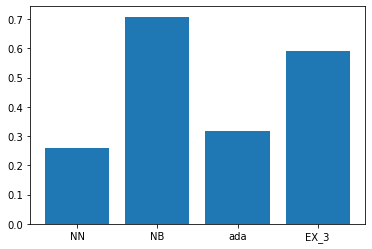

In [42]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots() 
ax.set_xticks(np.arange(4))
ax.set_xticklabels(["NN","NB","ada","EX_3"])
plt.bar(range(4),[NN_ACC, NB_ACC, ada_ACC, EX_3_ACC] )
plt.show()

In [46]:
from sklearn.ensemble import VotingClassifier
voter = VotingClassifier(estimators=[('EX_3',EX_3),('NB',clf)],voting='soft')
voter.fit(X_train,Y_train)

VotingClassifier(estimators=[('EX_3',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                 

In [0]:
voter_pred = voter.predict(X_test)

In [49]:
accuracy_score(Y_test,voter_pred)

0.7127764850624515

In [0]:
"Done"